<a href="https://colab.research.google.com/github/ComradeRomanov/anodet/blob/master/patchcore_anomaly_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/OpenAOI/anodet.git

Cloning into 'anodet'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 516 (delta 85), reused 77 (delta 76), pack-reused 418
Receiving objects: 100% (516/516), 5.87 MiB | 43.90 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [ ]:
%cd anodet
!python -m pip install -r requirements.txt
!python -m pip install .

/content/anodet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 30.7 MB/s 
     |████████████████████████████████| 20.0 MB 1.3 MB/s 
     |████████████████████████████████| 60.3 MB 118 kB/s 
     |████████████████████████████████| 3.1 MB 58.0 MB/s 
     |████████████████████████████████| 23.2 MB 131.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 584 kB 64.3 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0xbc88000 @  0x7fa01e3f1615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 16 kB/s 
     |███

In [ ]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 29.3 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# PatchCore Example

#### Import dependencies

In [ ]:
import os
import anodet
import numpy as np
import torch
import cv2
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Signatures_Dataset.zip' -d '/content/Datasets'

Archive:  /content/drive/MyDrive/Signatures_Dataset.zip
   creating: /content/Datasets/Signatures 3/
  inflating: /content/Datasets/__MACOSX/._Signatures 3  
  inflating: /content/Datasets/Signatures 3/.DS_Store  
  inflating: /content/Datasets/__MACOSX/Signatures 3/._.DS_Store  
   creating: /content/Datasets/Signatures 3/Authentic/
  inflating: /content/Datasets/__MACOSX/Signatures 3/._Authentic  
   creating: /content/Datasets/Signatures 3/unknowns/
  inflating: /content/Datasets/__MACOSX/Signatures 3/._unknowns  
   creating: /content/Datasets/Signatures 3/fakes/
  inflating: /content/Datasets/__MACOSX/Signatures 3/._fakes  
   creating: /content/Datasets/Signatures 3/New Folder With Items/
   creating: /content/Datasets/Signatures 3/Testing Set/
  inflating: /content/Datasets/Signatures 3/Authentic/image1_3.png  
  inflating: /content/Datasets/__MACOSX/Signatures 3/Authentic/._image1_3.png  
  inflating: /content/Datasets/Signatures 3/Authentic/TD Bank - PDF Format-822-cropped-1.p

# 

## Training

In this notebook the MVTec dataset will be used. It can be downloaded from: https://www.mvtec.com/company/research/datasets/mvtec-ad.

Change `DATASET_PATH` to the path where you save the dataset.

Also, if you want to save and load the model. Add a folder where to save them and change the path of `MODEL_DATA_PATH` to that folder.

In [ ]:
DATASET_PATH = os.path.realpath("/content/Datasets/")
MODEL_DATA_PATH = os.path.realpath("./distributions/")

#### Load dataset

In [ ]:
dataset = anodet.AnodetDataset(os.path.join(DATASET_PATH, "Signatures 3/Authentic"))
dataloader = DataLoader(dataset, batch_size=8)
print("Number of images in dataset:", len(dataloader.dataset))

Number of images in dataset: 64


#### Init the model

In [ ]:
patch_core = anodet.PatchCore()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

#### Fit the model to the dataset

In [ ]:
patch_core.fit(dataloader)

Feature extraction: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]


Getting transformed features...
Calculating distances...
Maximum distance from cluster centers is 3.73


#### Save the necessary parameters

In [ ]:
!mkdir = './distributions/'

In [ ]:
torch.save(patch_core.embedding_coreset, os.path.join(MODEL_DATA_PATH, "signature_embedding_coreset.pt"))

# 

## Inference
#### Load test images

In [ ]:
paths = []
for root, subdirs, files in os.walk("/content/Datasets/Signatures 3/Testing Set"):
  for file in files:
    if file.endswith('.png'):
      paths.append(os.path.join(root,file))
print(paths)

['/content/Datasets/Signatures 3/Testing Set/FAKE-2.png', '/content/Datasets/Signatures 3/Testing Set/ORI_TD Bank - PDF Format-824-cropped-1.png', '/content/Datasets/Signatures 3/Testing Set/image2_6.png', '/content/Datasets/Signatures 3/Testing Set/image4_5.png', '/content/Datasets/Signatures 3/Testing Set/image3_1.png', '/content/Datasets/Signatures 3/Testing Set/ORI_TD Bank - PDF Format-811 copy 2-cropped-1.png', '/content/Datasets/Signatures 3/Testing Set/image2_4.png', '/content/Datasets/Signatures 3/Testing Set/image3_3.png', '/content/Datasets/Signatures 3/Testing Set/image3_6.png', '/content/Datasets/Signatures 3/Testing Set/FAKE-4.png', '/content/Datasets/Signatures 3/Testing Set/image3_4.png', '/content/Datasets/Signatures 3/Testing Set/image4_3.png', '/content/Datasets/Signatures 3/Testing Set/image3_5.png', '/content/Datasets/Signatures 3/Testing Set/image2_3.png', '/content/Datasets/Signatures 3/Testing Set/ORI_image1_2.png', '/content/Datasets/Signatures 3/Testing Set/ORI

In [ ]:
# paths = [
#     os.path.join(DATASET_PATH, "bottle/test/broken_large/000.png"),
#     os.path.join(DATASET_PATH, "bottle/test/broken_small/000.png"),
#     os.path.join(DATASET_PATH, "bottle/test/contamination/000.png"),
#     os.path.join(DATASET_PATH, "bottle/test/good/000.png"),
#     os.path.join(DATASET_PATH, "bottle/test/good/001.png"),
# ]

images = []
for path in paths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    
batch = anodet.to_batch(images, anodet.standard_image_transform, torch.device('cpu'))

#### Load the model data

In [ ]:
embedding_coreset = torch.load(os.path.join(MODEL_DATA_PATH, 'signature_embedding_coreset.pt'))

#### init the model

In [ ]:
patch_core = anodet.PatchCore('resnet18', embedding_coreset=embedding_coreset)

#### Make prediction

In [ ]:
image_scores, score_maps = patch_core.predict(batch)

#### Interpret the prediction

In [ ]:
THRESH = 3.22
score_map_classifications = anodet.classification(score_maps, THRESH)
image_classifications = anodet.classification(image_scores, THRESH)
print("Image scores:", image_scores)
print("Image classifications:", image_classifications)

Image scores: tensor([3.4735, 3.2112, 3.4822, 3.3296, 3.2060, 3.1410, 3.7490, 3.6660, 3.6007,
        3.5164, 3.3960, 3.4019, 3.2948, 3.5967, 3.0366, 3.0091, 3.6151, 3.2109,
        3.6254, 3.3092, 3.0914, 3.6020, 3.4669, 3.6327, 3.1174, 3.3930, 3.5829,
        3.4086, 3.5452, 3.1196, 3.7926, 3.3364, 3.5096, 3.4933, 3.5138, 3.7490,
        3.3418, 3.5669, 3.7116])
Image classifications: tensor([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])


#### Visualization

In [ ]:
test_images = np.array(images).copy()

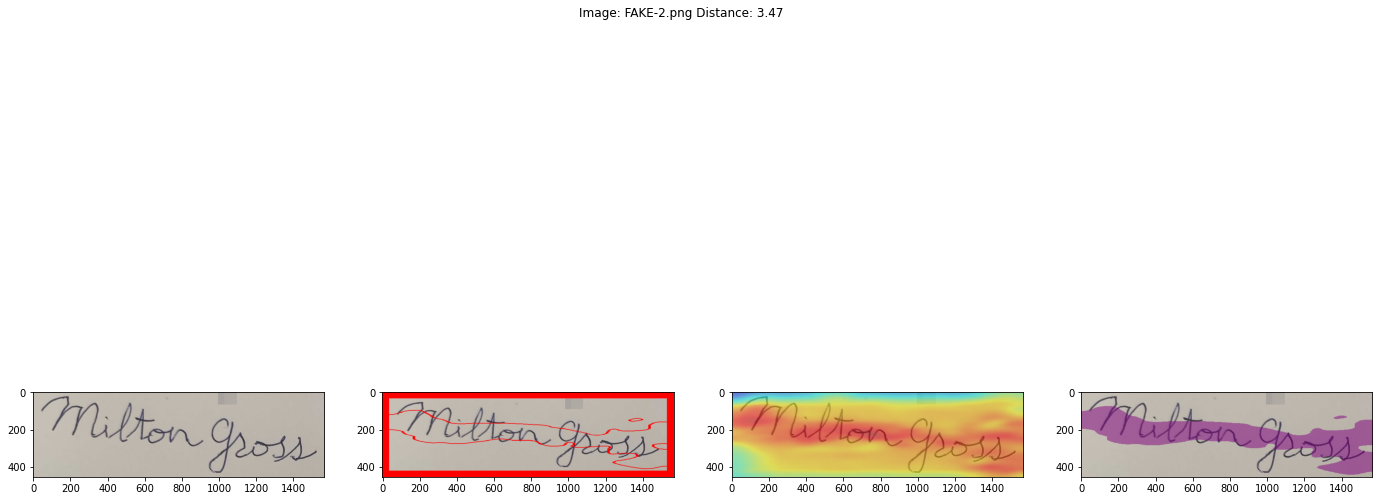

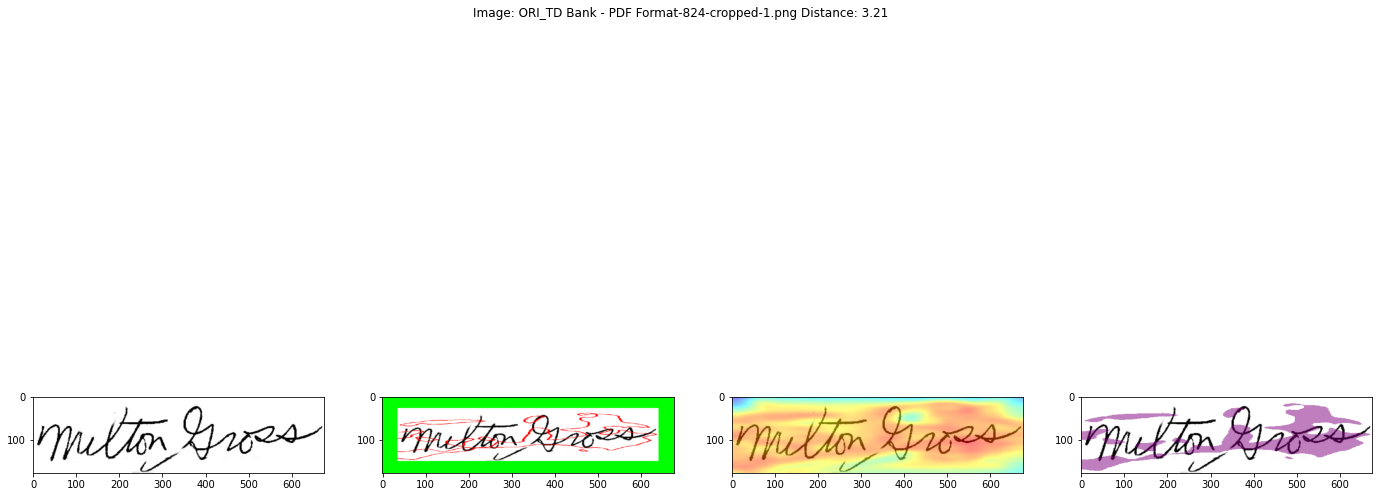

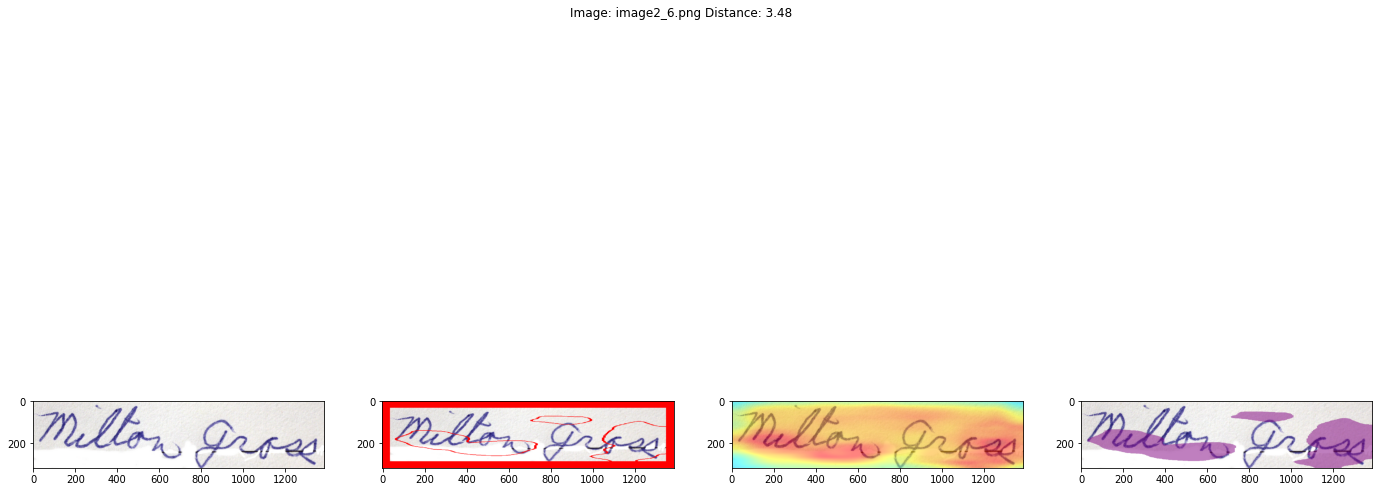

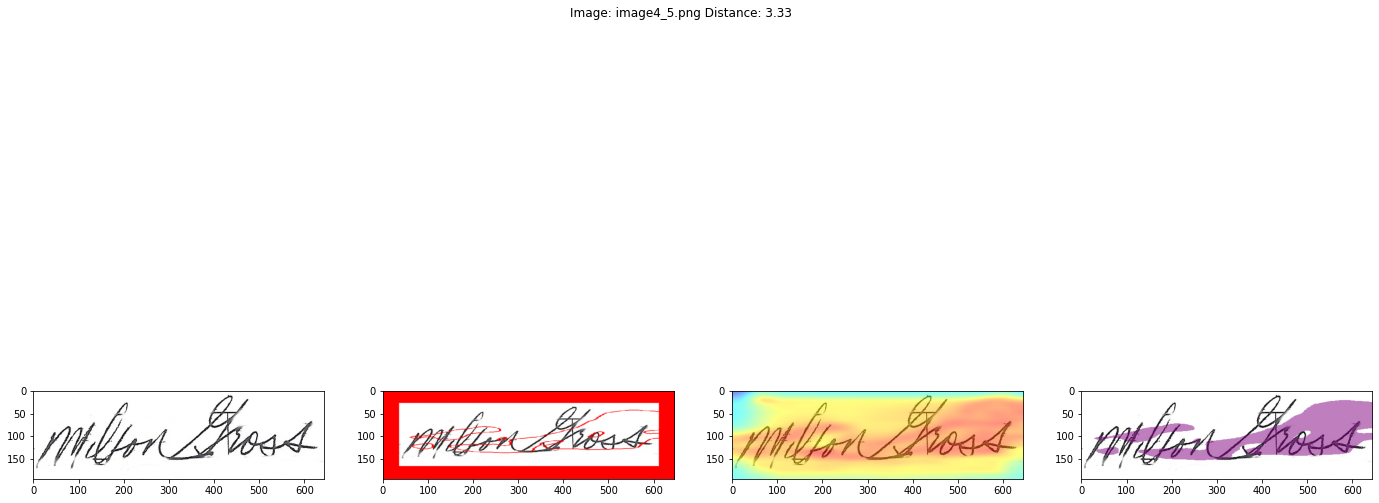

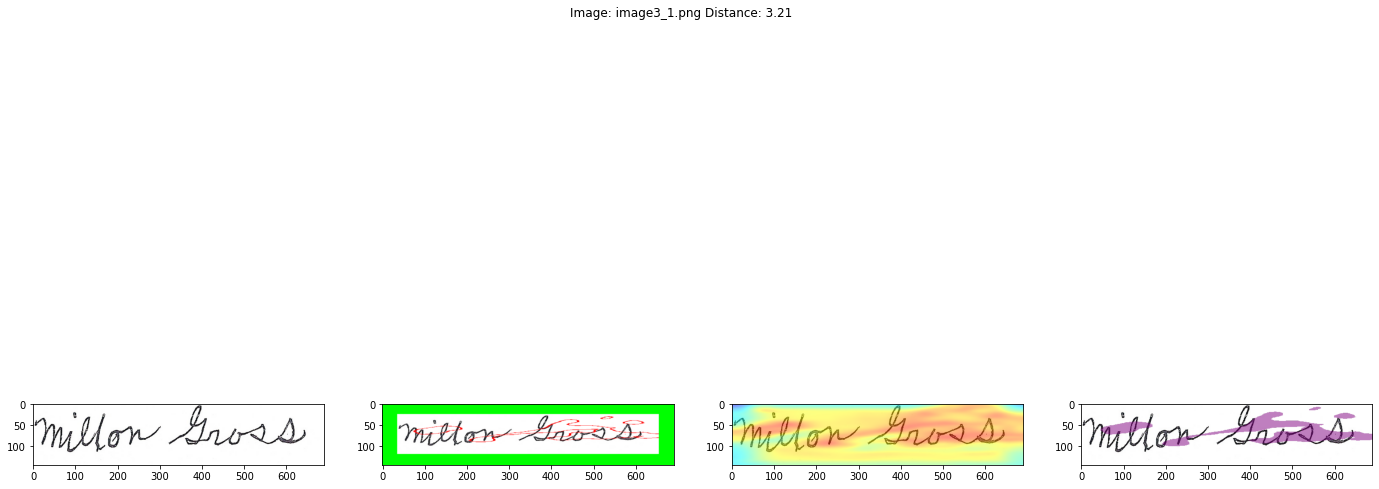

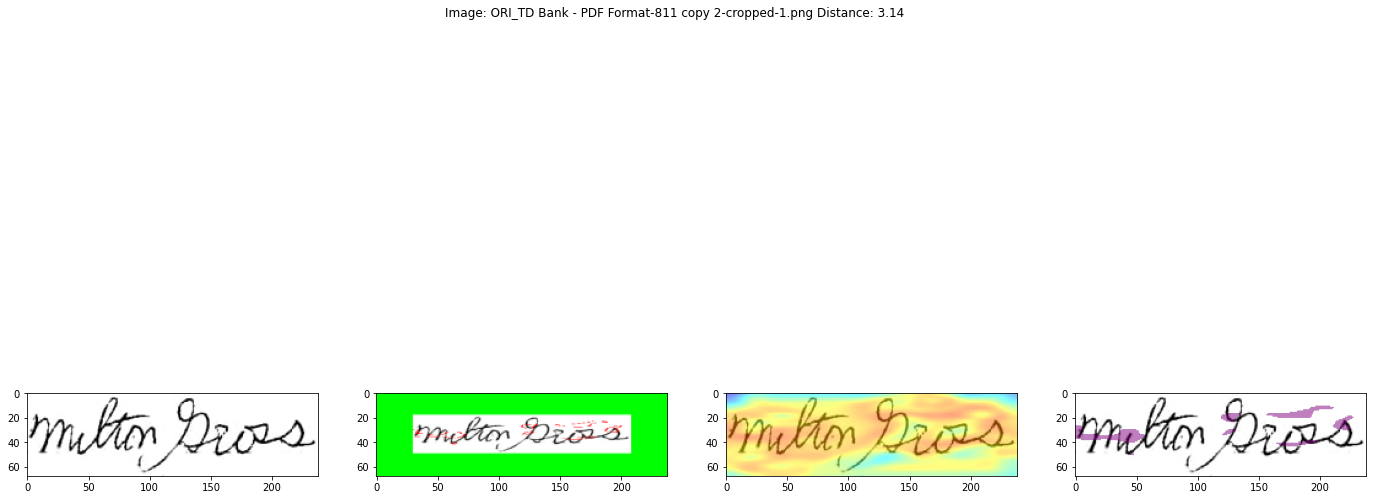

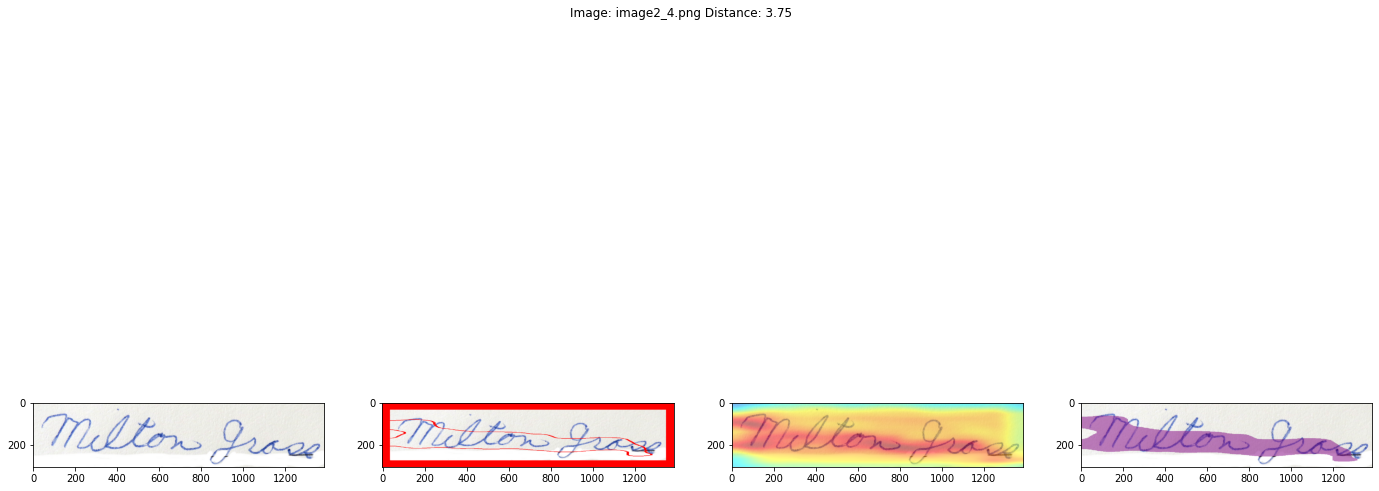

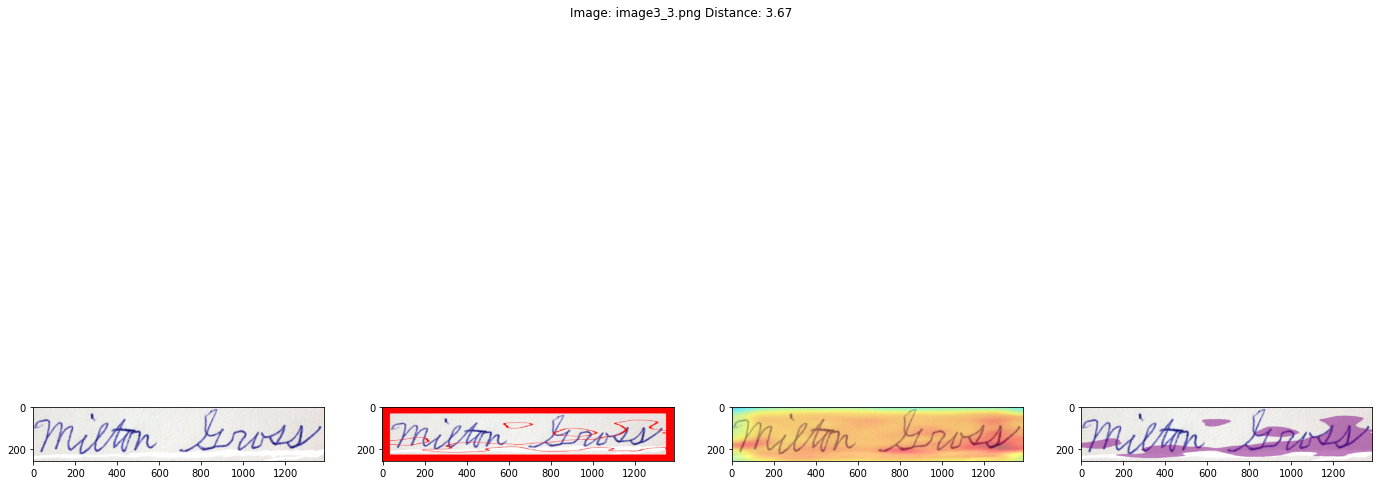

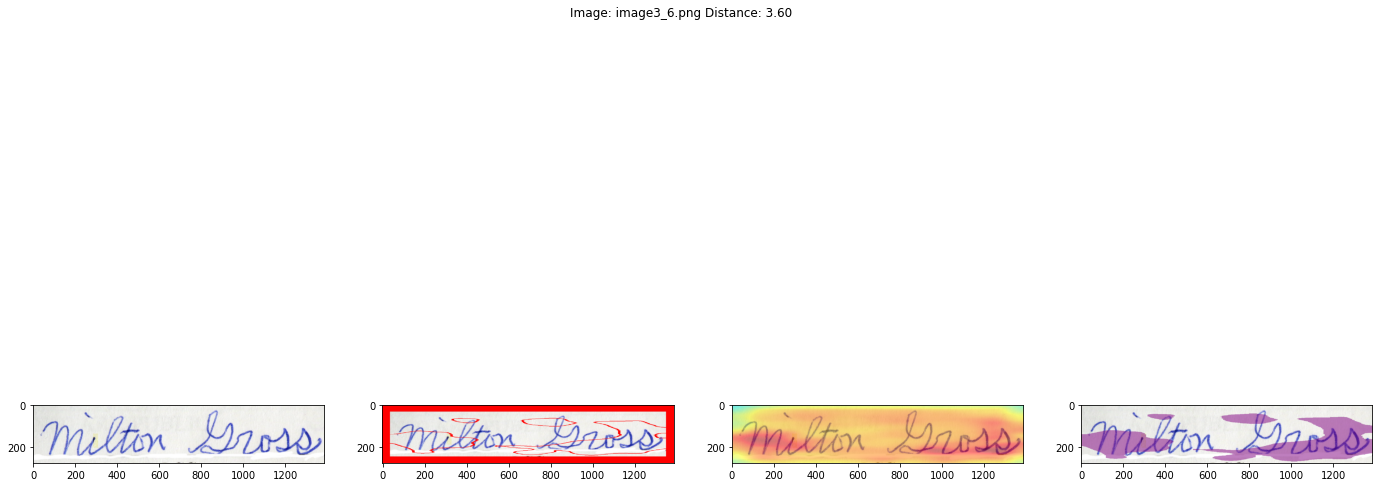

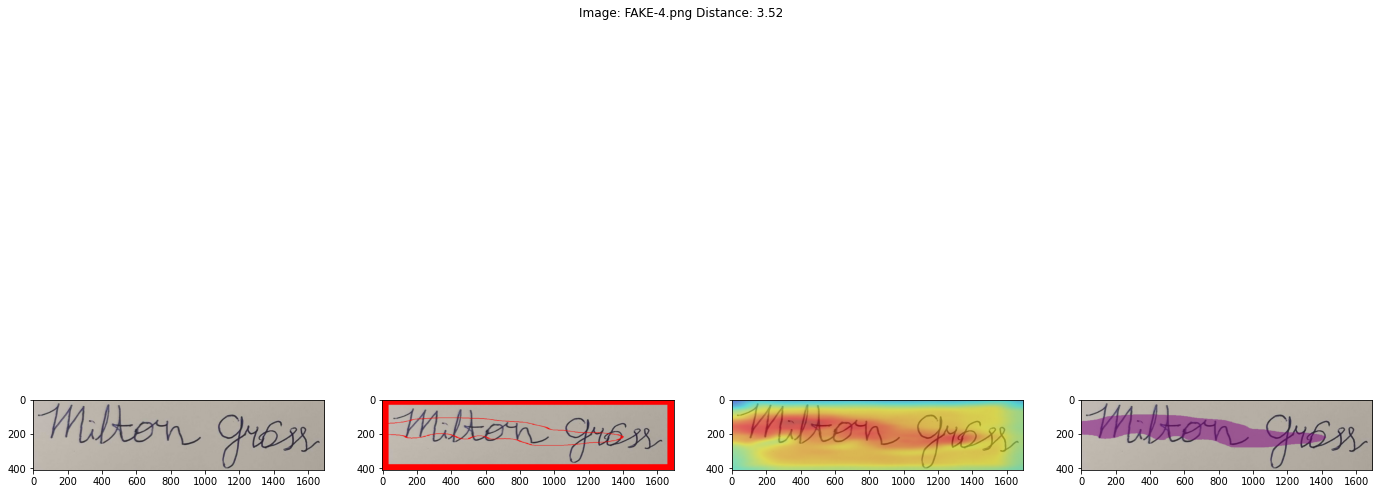

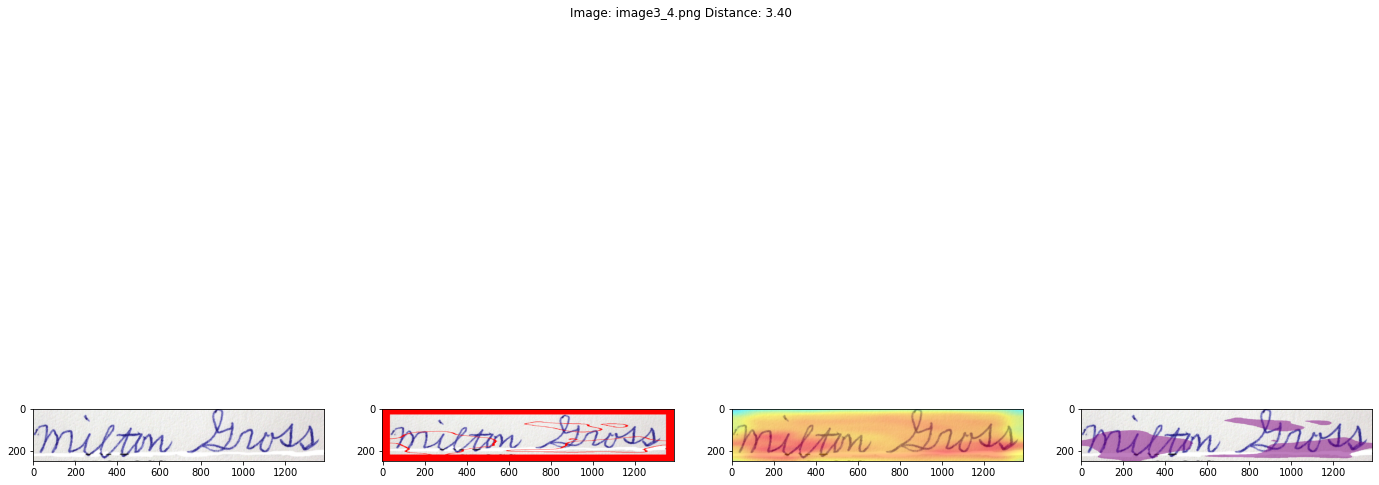

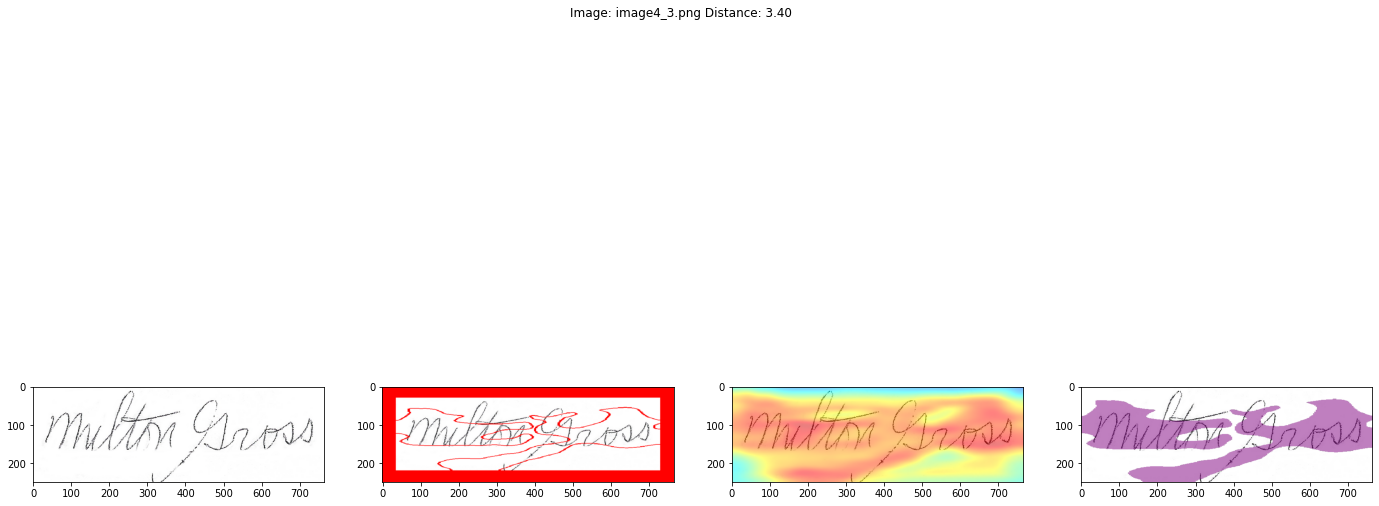

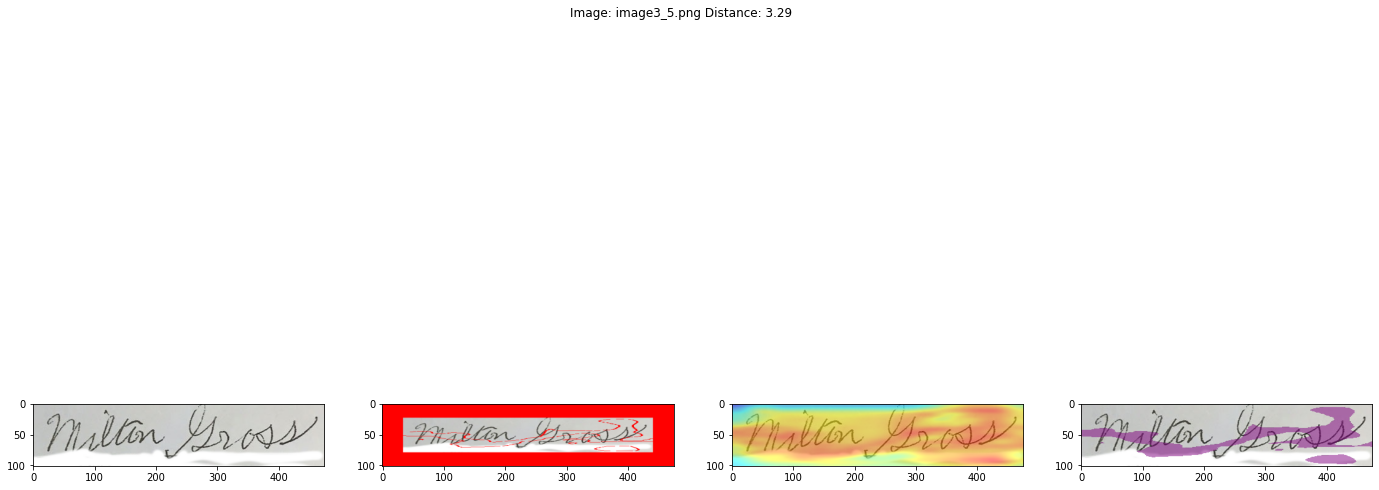

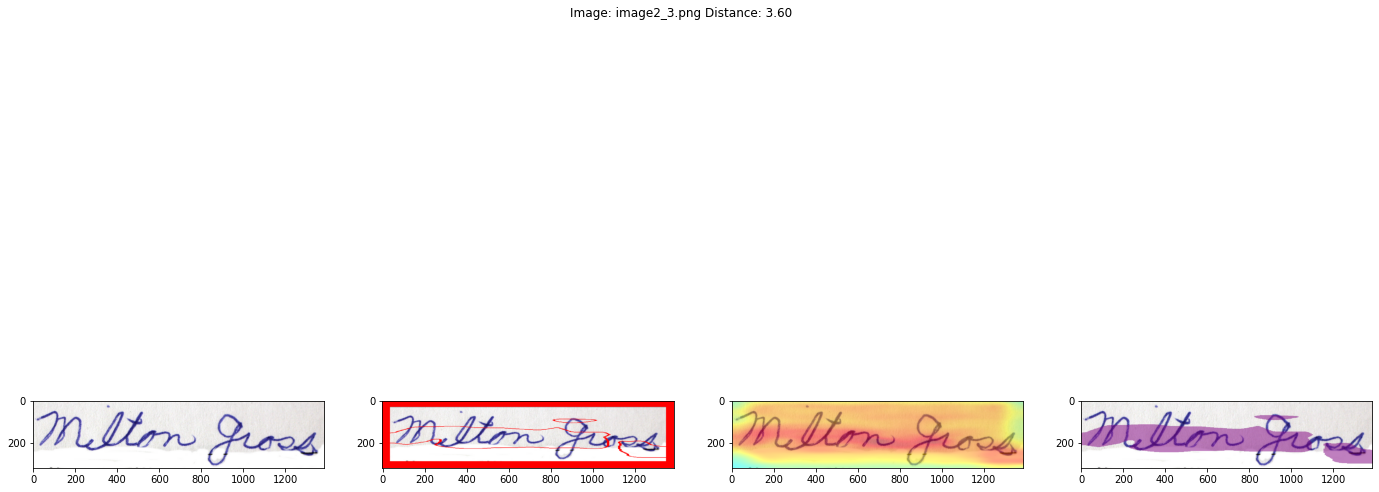

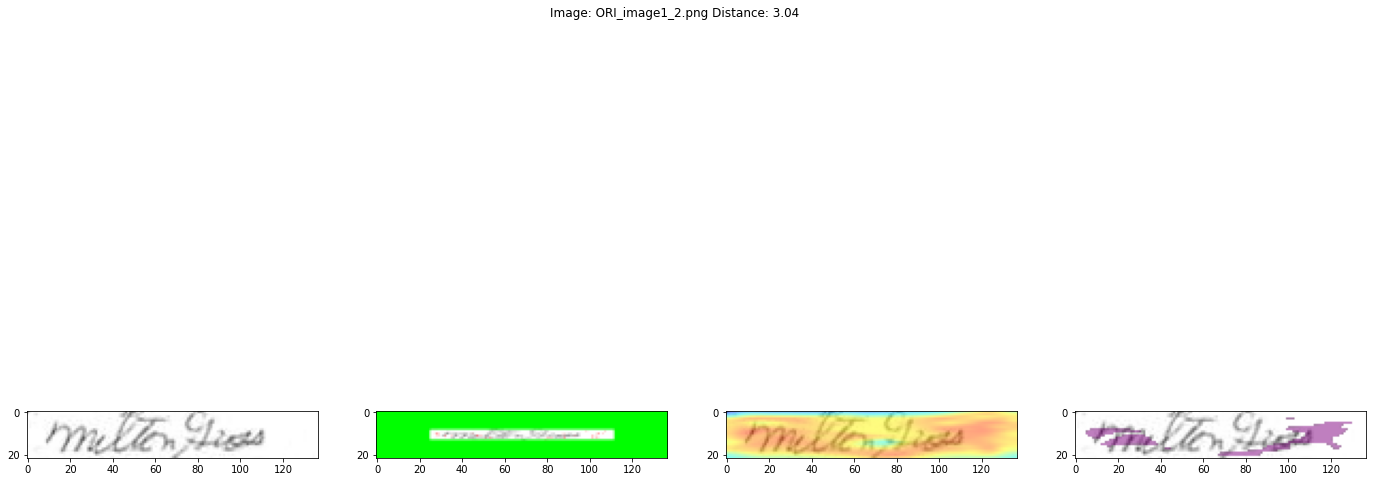

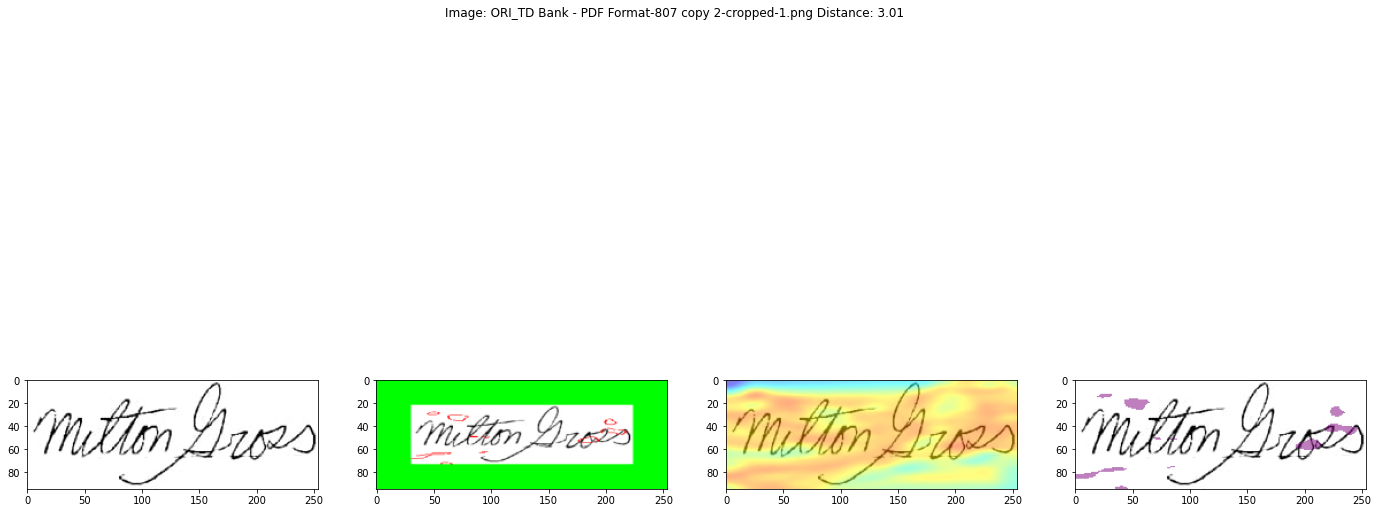

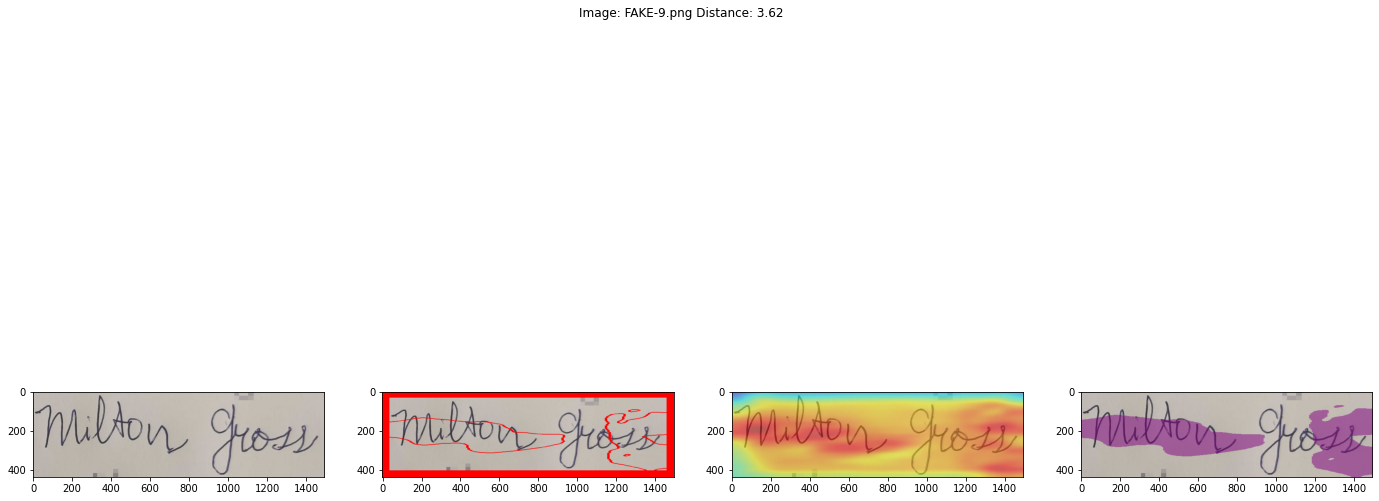

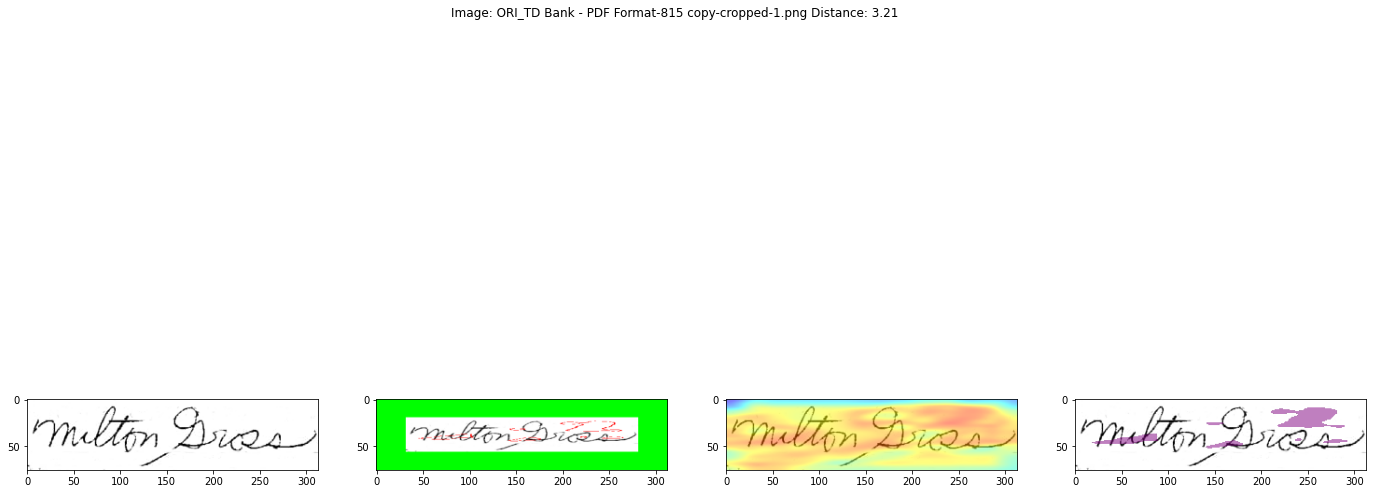

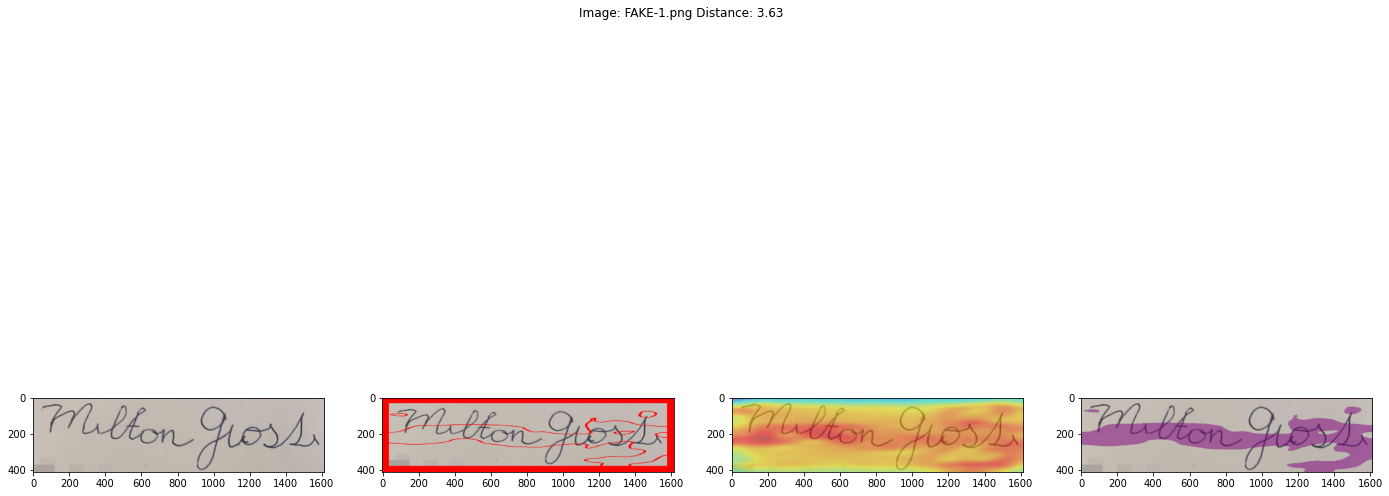

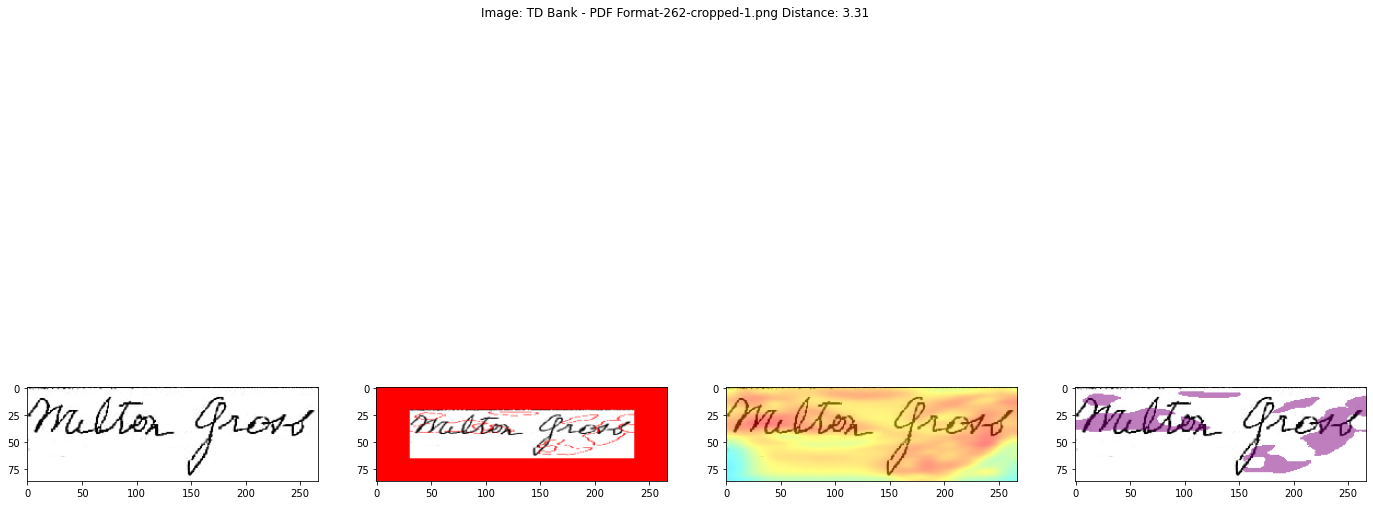

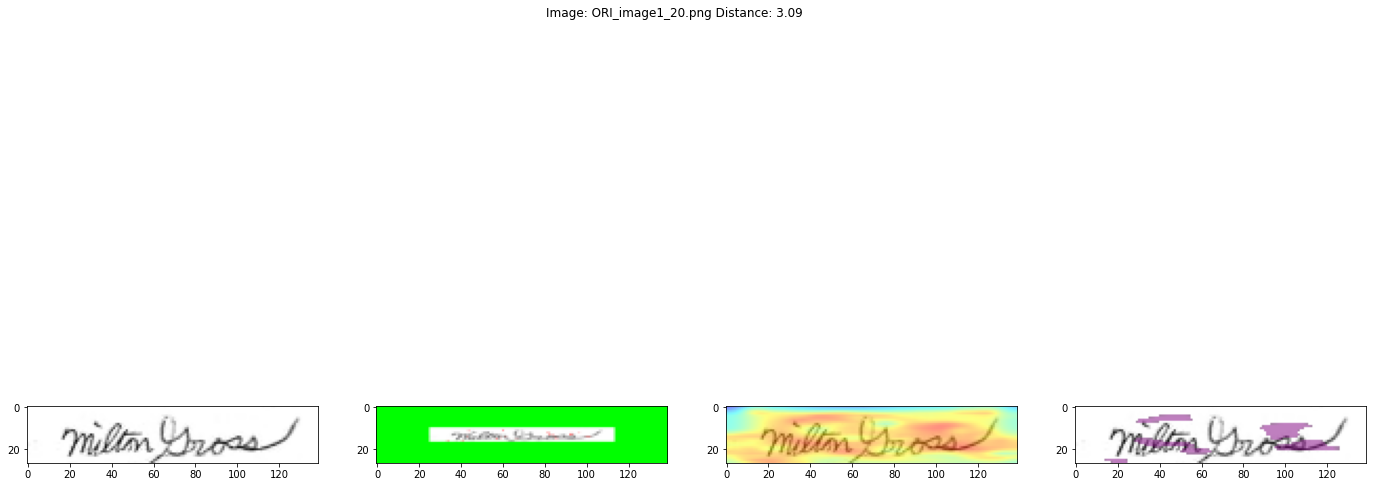

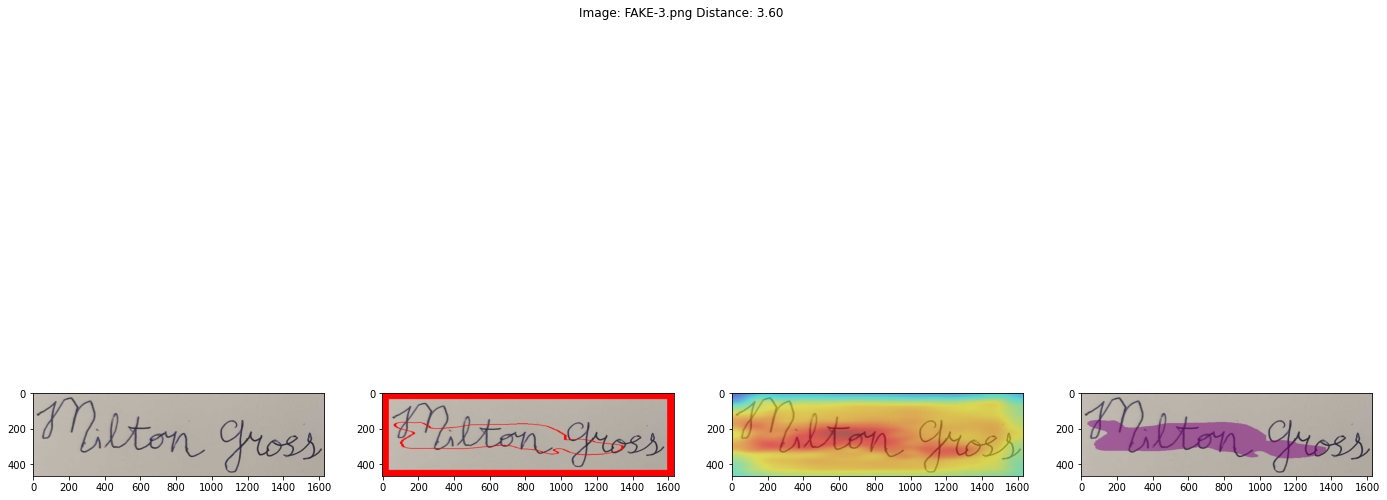

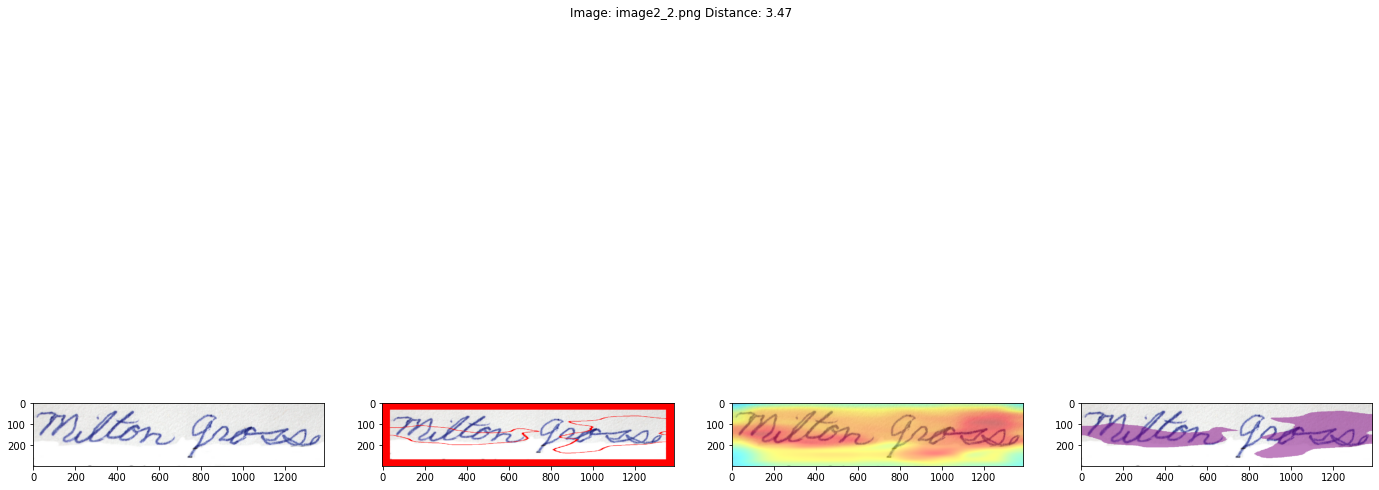

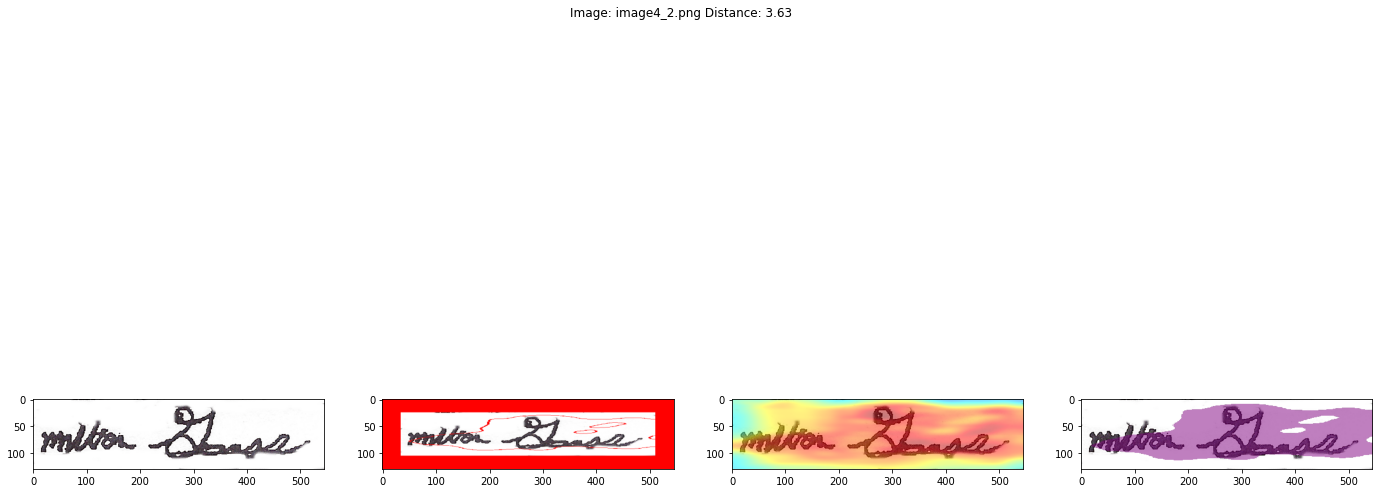

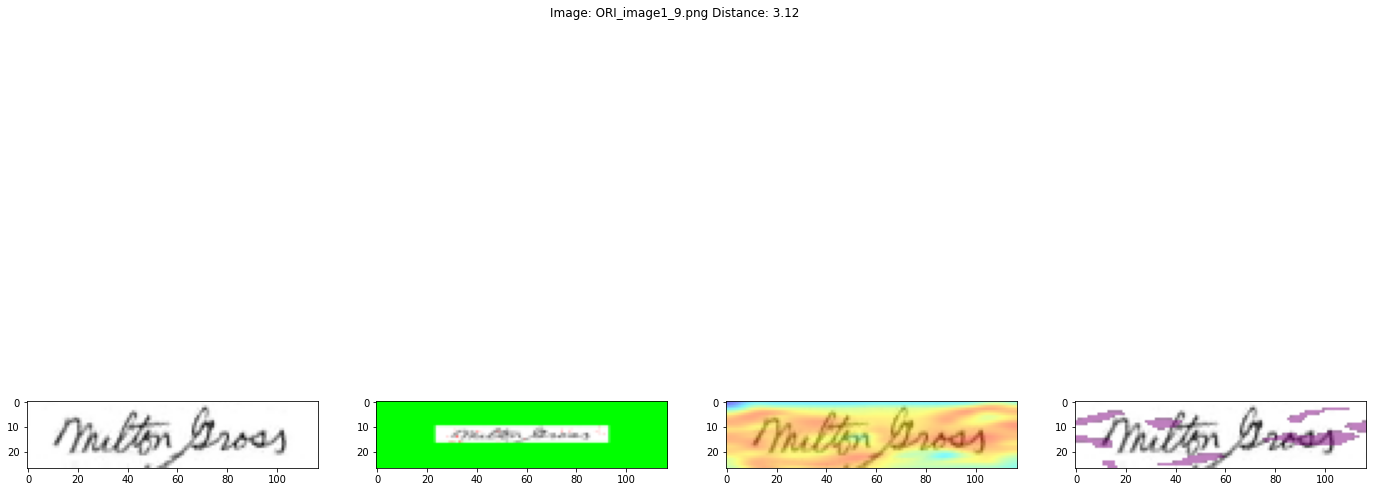

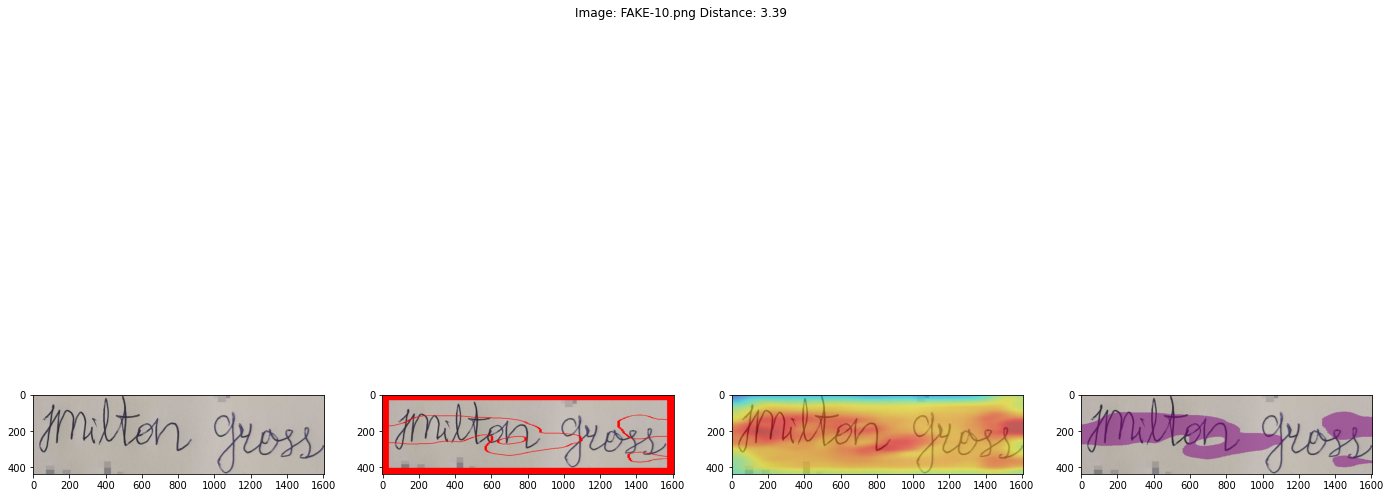

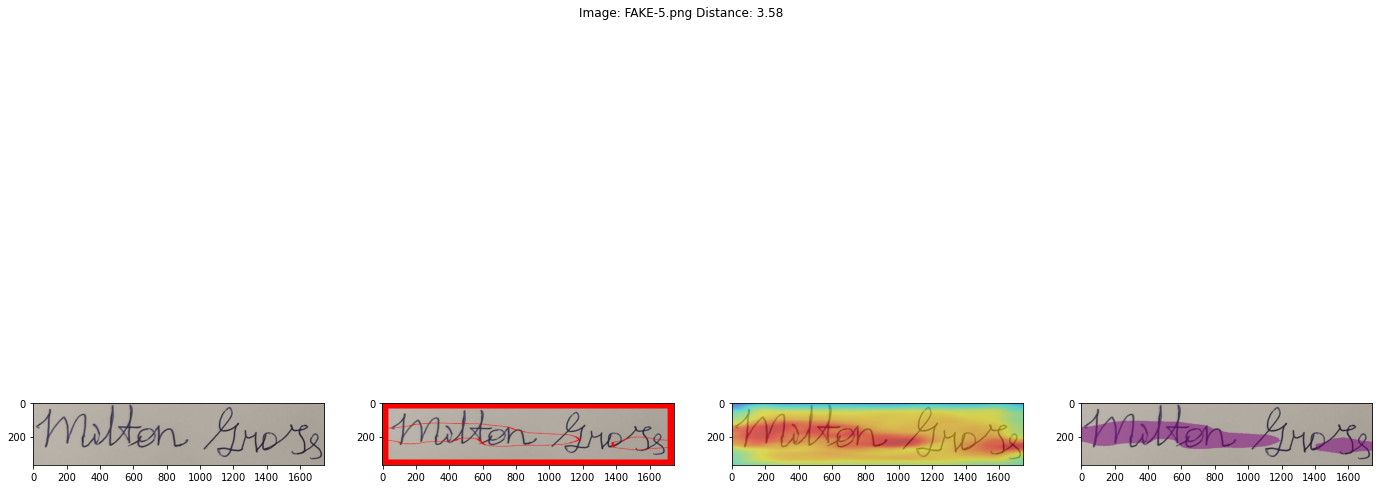

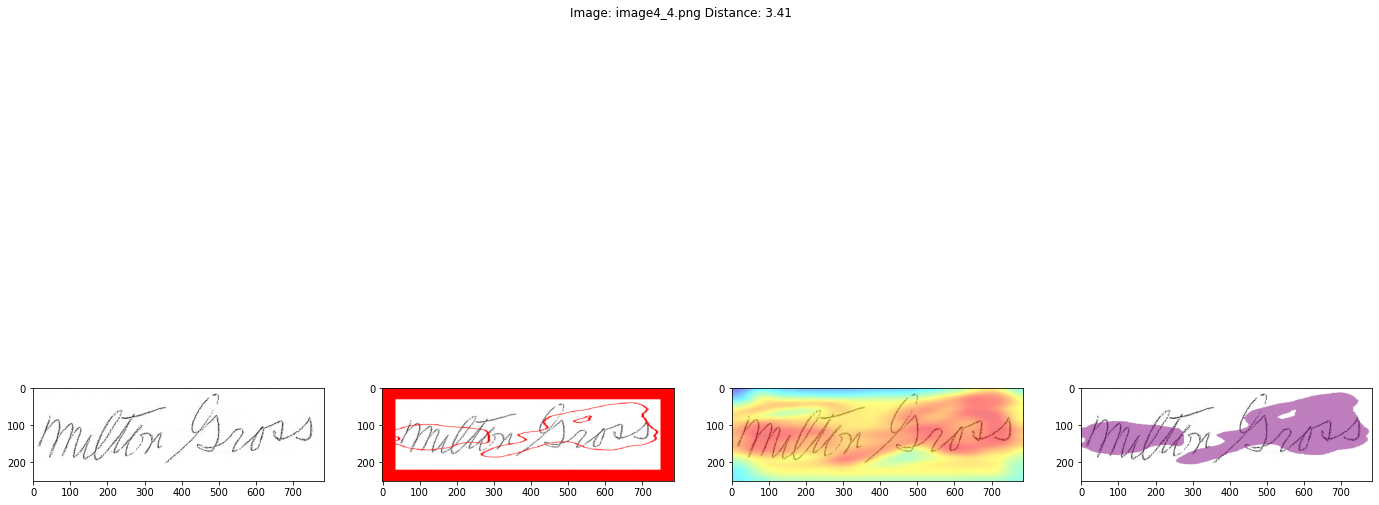

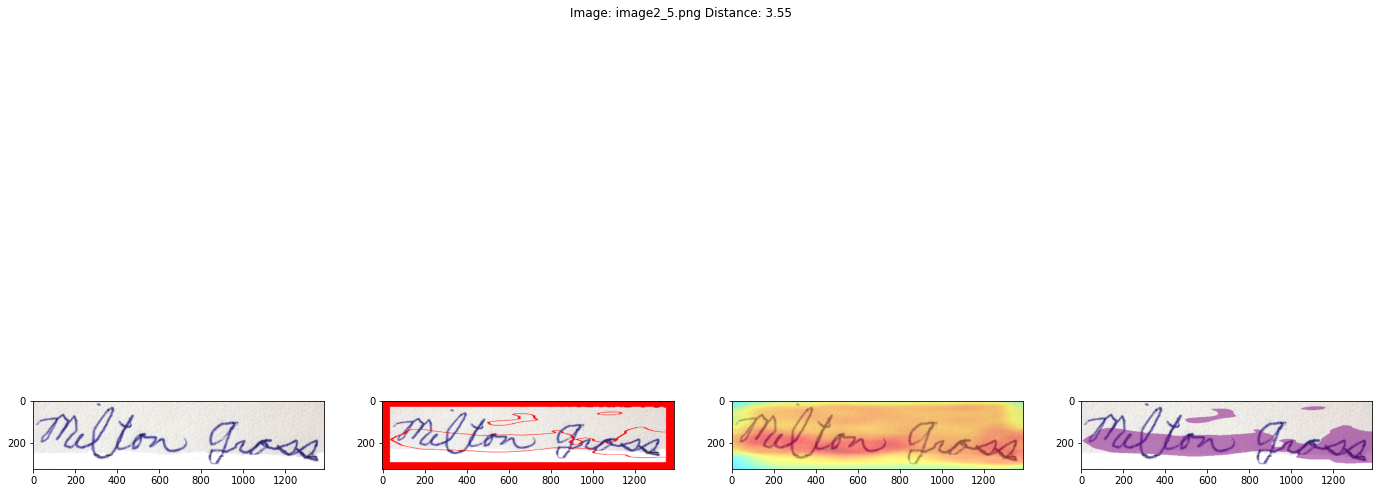

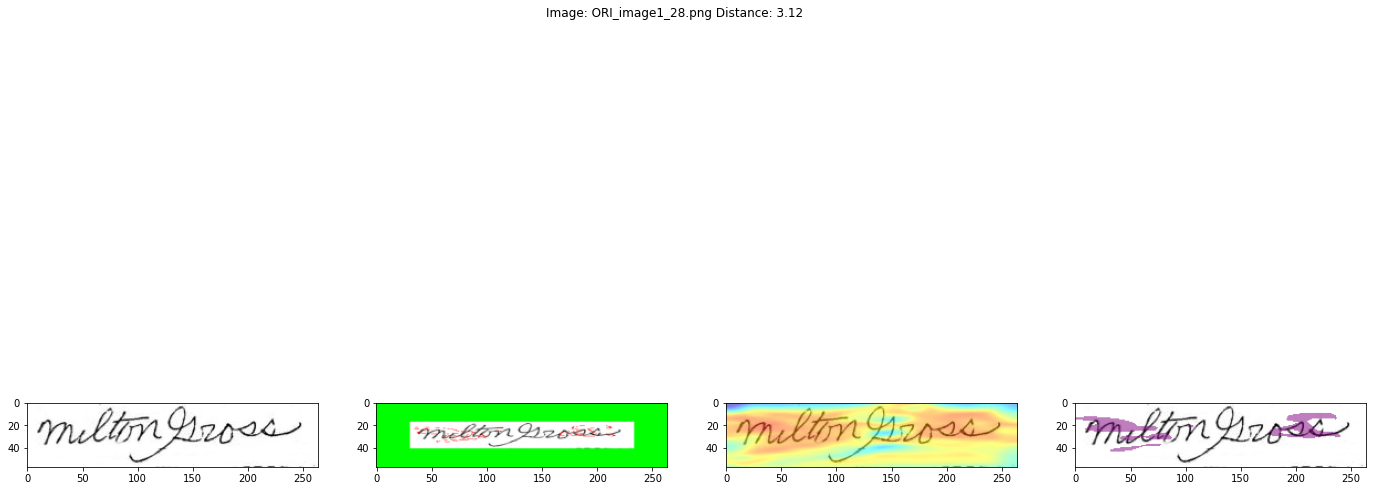

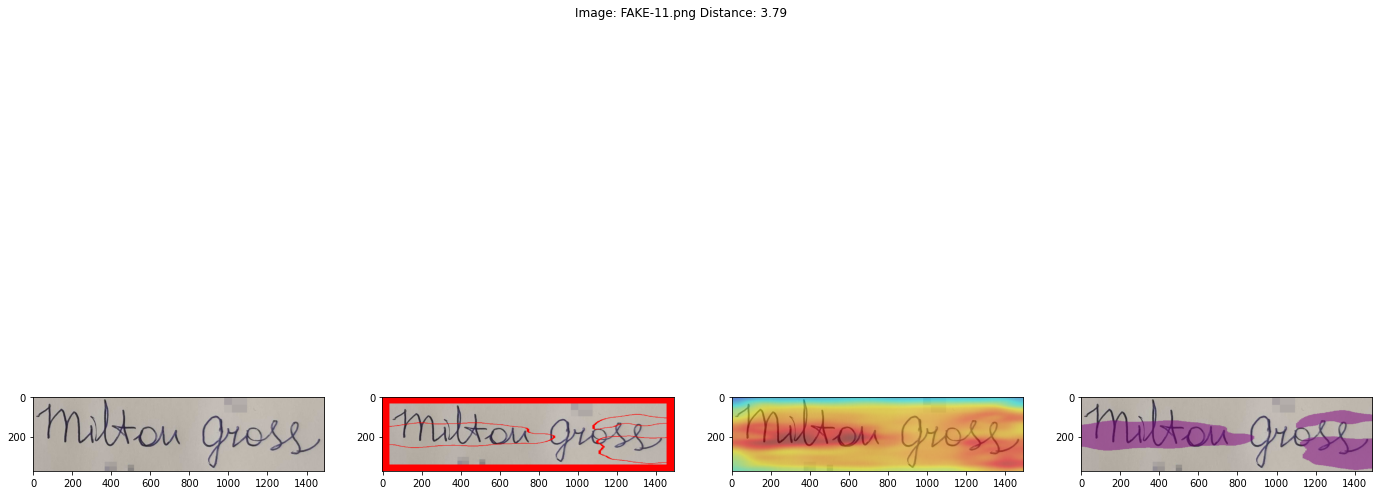

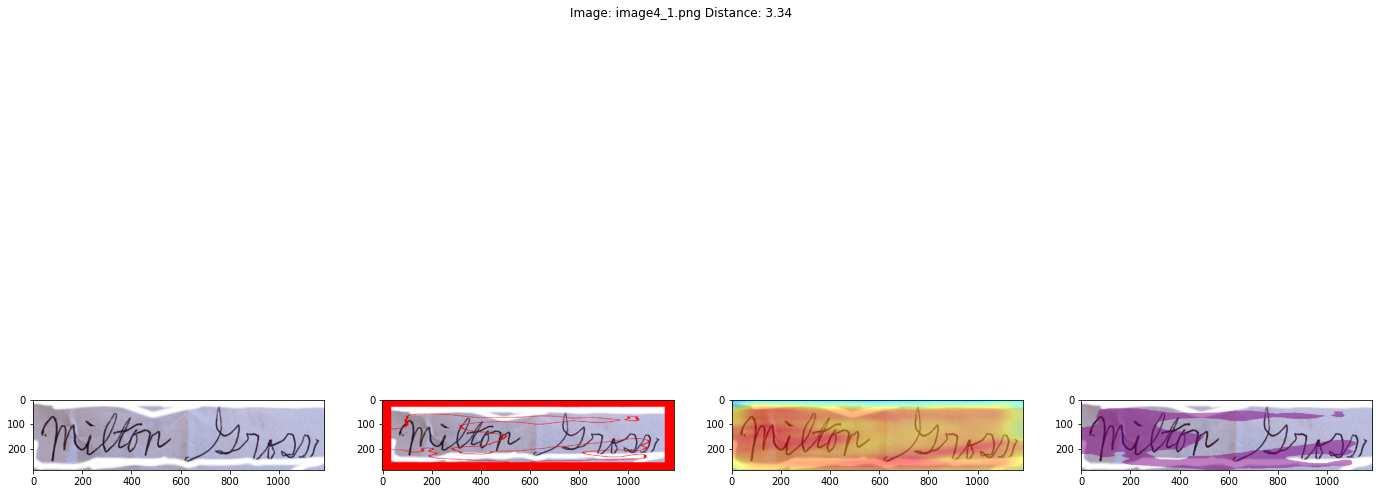

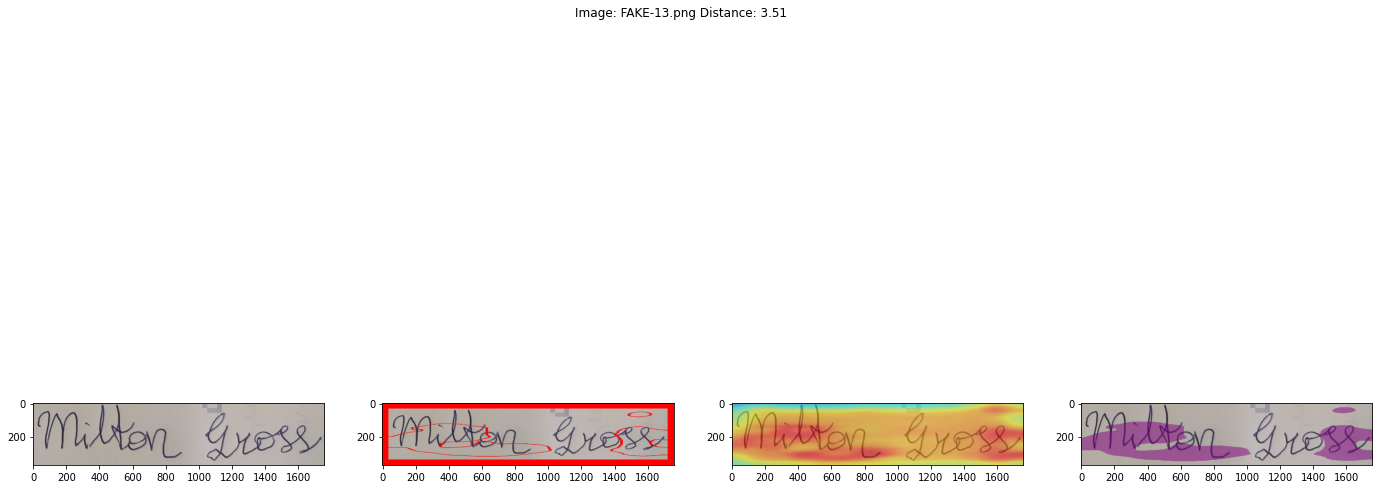

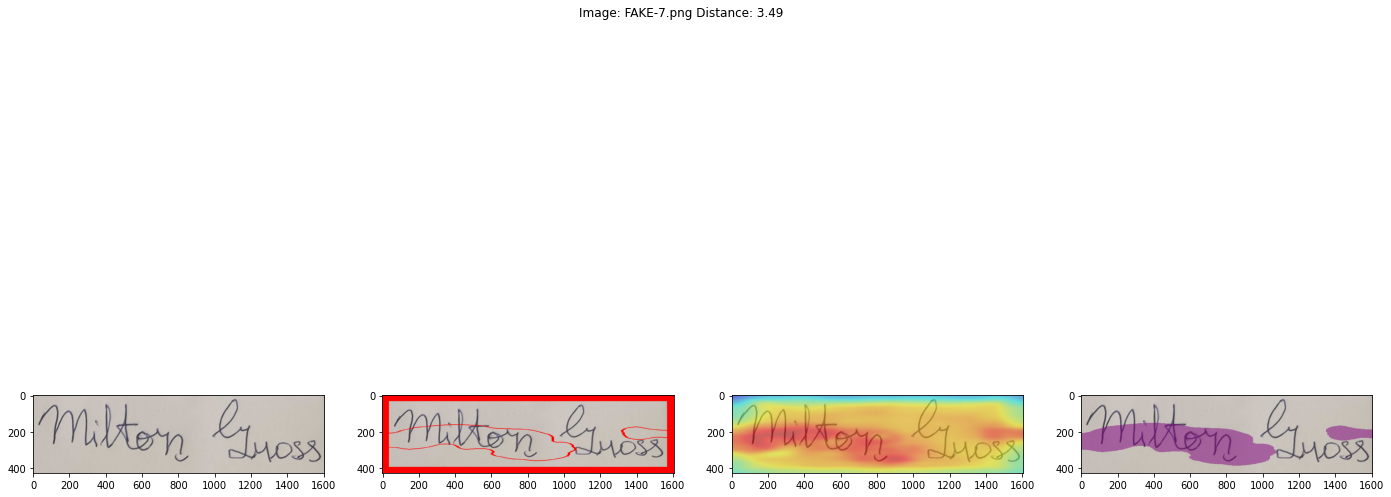

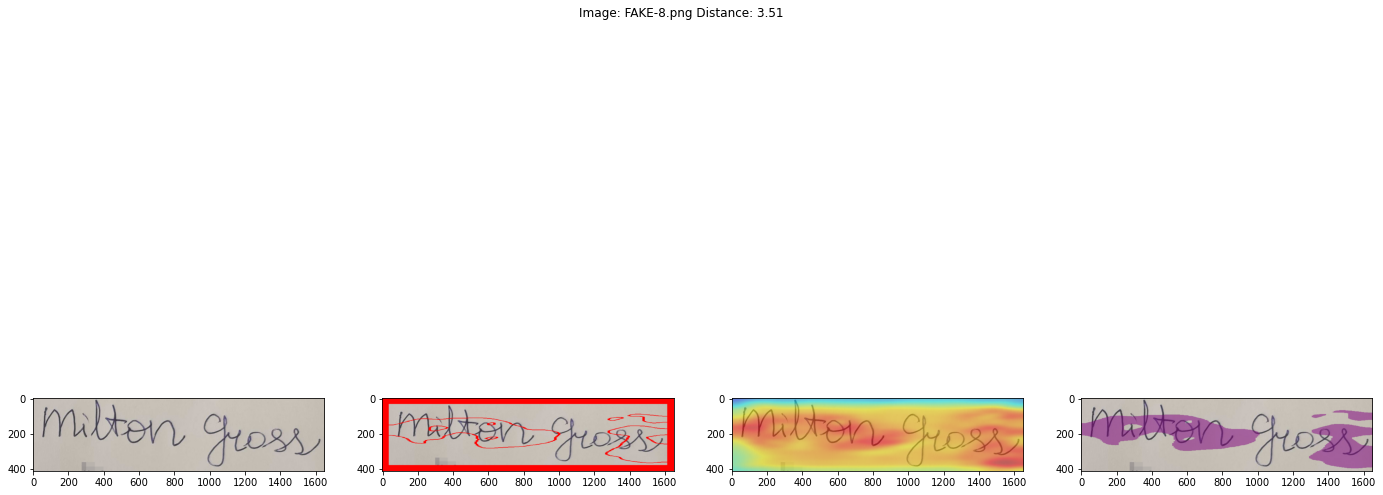

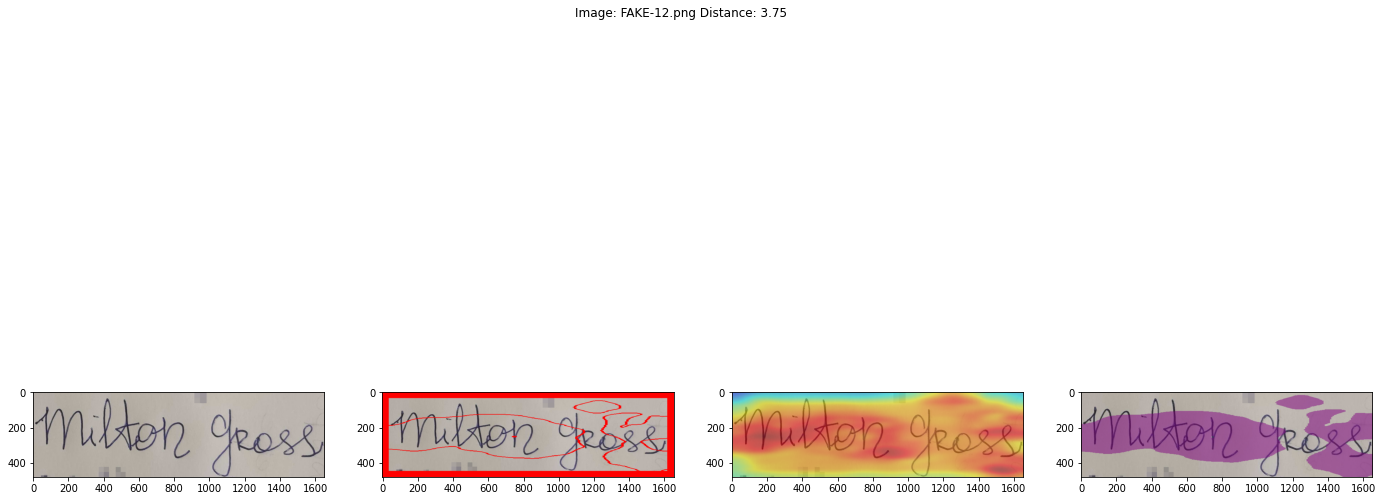

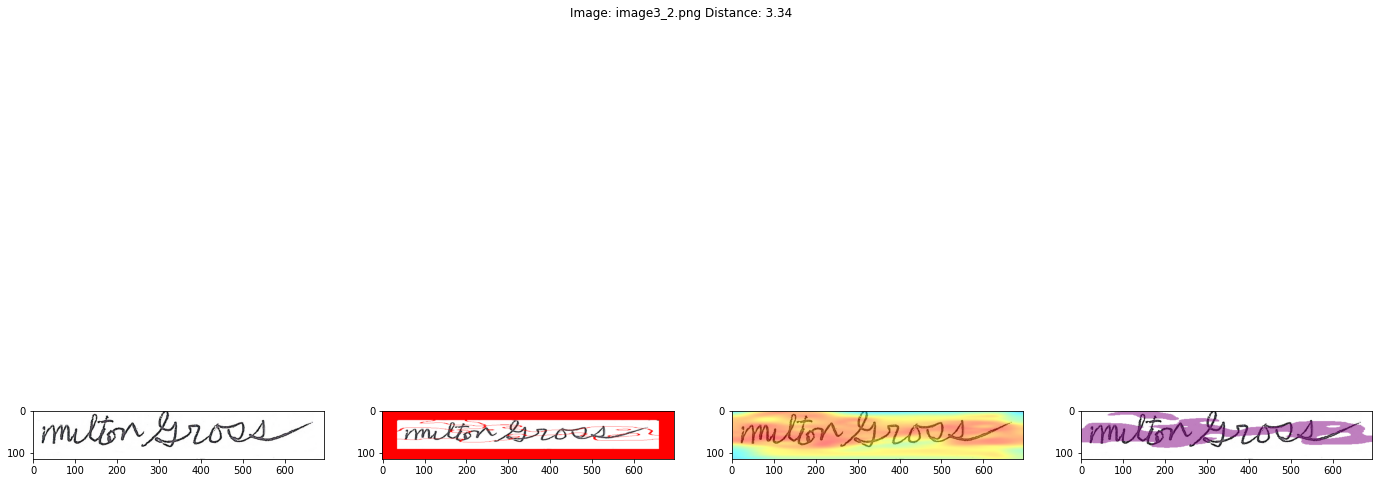

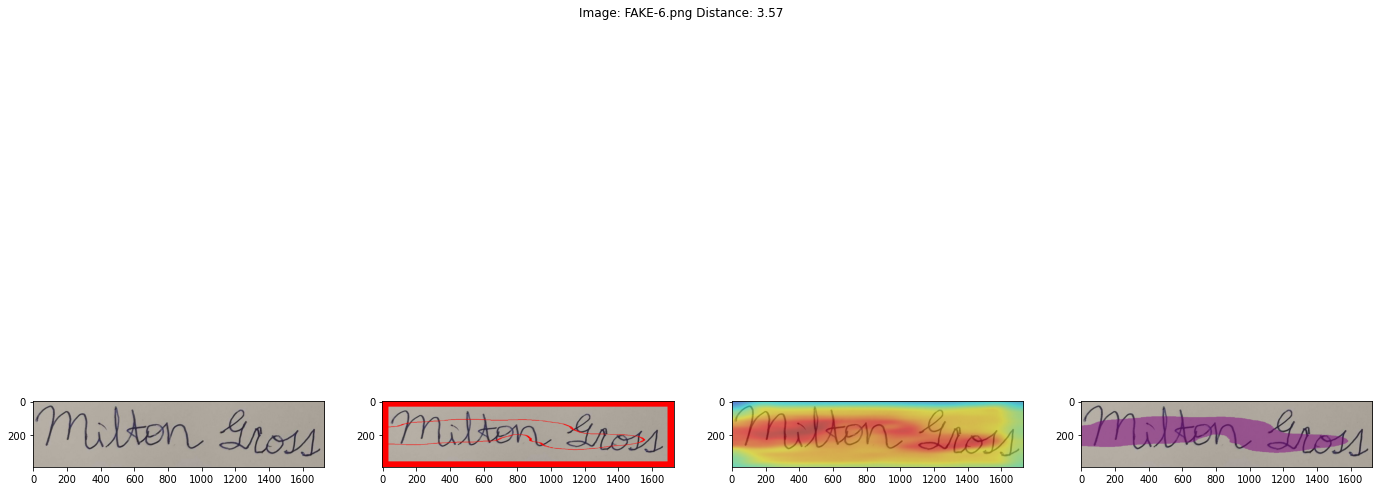

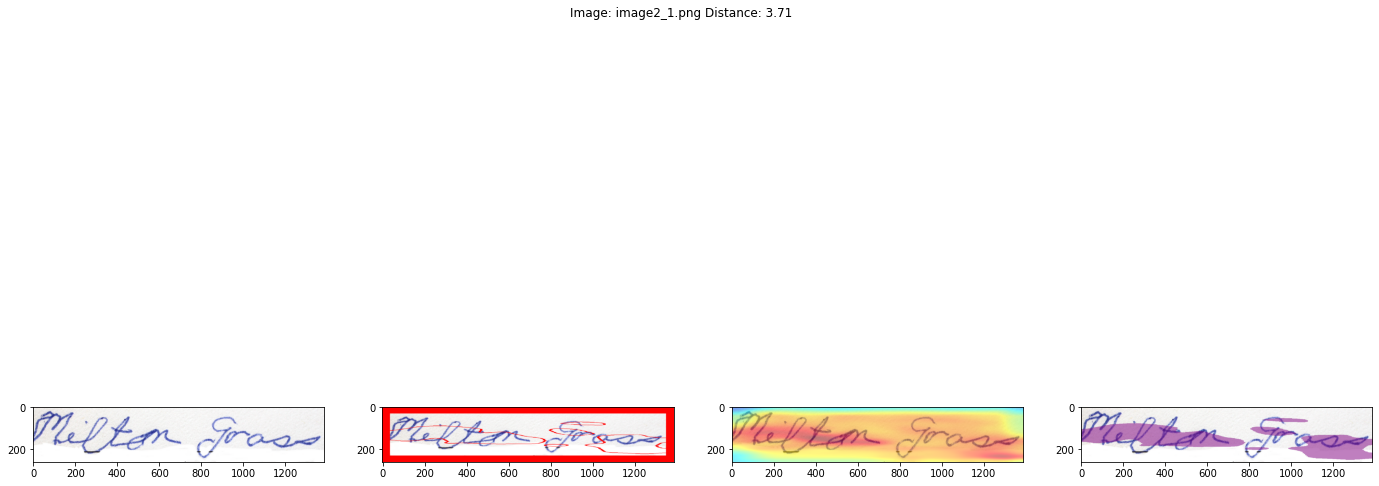

In [ ]:
boundary_images = anodet.visualization.framed_boundary_images(test_images, score_map_classifications, image_classifications, padding=40)
heatmap_images = anodet.visualization.heatmap_images(test_images, score_maps, alpha=0.5)
highlighted_images = anodet.visualization.highlighted_images(images, score_map_classifications, color=(128, 0, 128))

for idx in range(len(images)):
    fig, axs = plt.subplots(1, 4, figsize=(24, 24))
    fig.suptitle('Image: ' + str(paths[idx][43:]) + ' Distance: ' + ("{:.2f}".format(image_scores[idx])), y=0.75, fontsize=12)
    axs[0].imshow(images[idx])
    axs[1].imshow(boundary_images[idx])
    axs[2].imshow(heatmap_images[idx])
    axs[3].imshow(highlighted_images[idx])
    plt.show()

#### For one merged image

In [ ]:
# heatmap_images = anodet.visualization.heatmap_images(test_images, score_maps, alpha=0.5)
# tot_img = anodet.visualization.merge_images(heatmap_images, margin=40)
# fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# plt.imshow(tot_img)
# plt.show()